<a href="https://colab.research.google.com/github/rajaganesh1357/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/linear%20regression%20dataset.csv')

In [85]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [86]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [87]:
df.drop(165,inplace=True)
df.reset_index(inplace=True)

In [88]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [89]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [90]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [91]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [92]:
import re
def Remove_Extra_Space(x):
  return (re.sub(' +', ' ', x).strip())

In [93]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

In [94]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

In [95]:
df['Region'].unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [96]:
df['Region'] = df['Region'].map({'Bejaia' : 0, 'Sidi-Bel Abbes': 1})

In [97]:
df.isnull().sum()

index          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

In [98]:
df.dtypes

index                   int64
Temperature             int64
RH                      int64
Ws                      int64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
Classes                 int64
Region                  int64
date           datetime64[ns]
dtype: object

In [99]:
df.describe()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,121.320988,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.563786,0.497942
std,70.671074,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.496938,0.501028
min,0.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,121.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000,0.000000
75%,182.500000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000,1.000000
max,243.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


In [100]:
df.nunique()

index          243
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            126
Classes          2
Region           2
date           122
dtype: int64

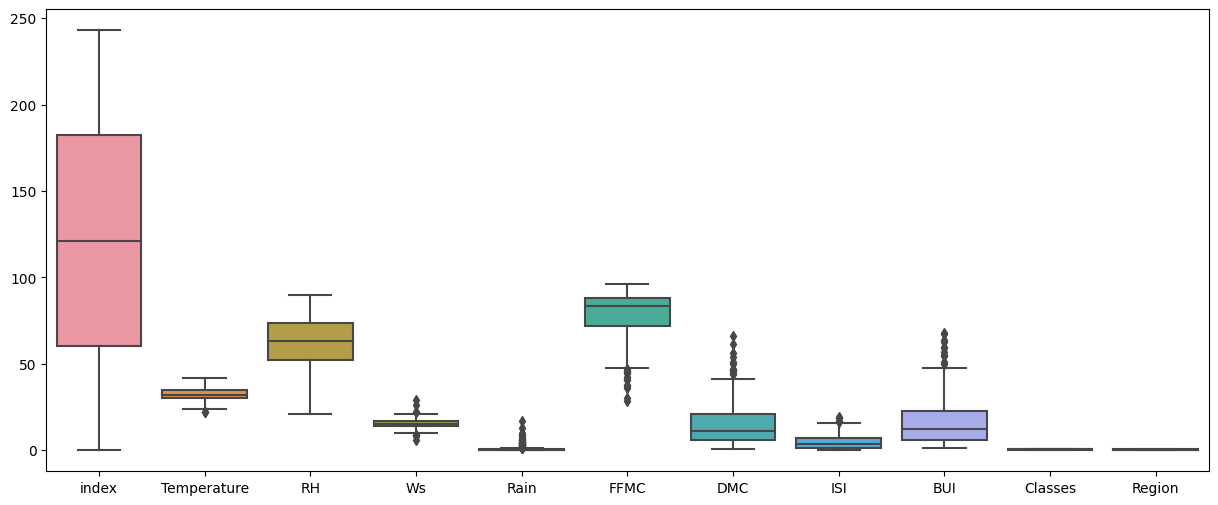

In [101]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.show()

In [102]:
df.duplicated().sum()

0

In [103]:
X = df[['Temperature', 'RH', 'Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df[['Classes']]

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [107]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.9, 'x[7] <= 3.05\ngini = 0.494\nsamples = 170\nvalue = [76, 94]'),
 Text(0.5, 0.7, 'x[4] <= 82.15\ngini = 0.05\nsamples = 78\nvalue = [76, 2]'),
 Text(0.3333333333333333, 0.5, 'x[4] <= 80.45\ngini = 0.026\nsamples = 77\nvalue = [76, 1]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.5, 0.3, 'x[0] <= 31.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 92\nvalue = [0, 92]')]

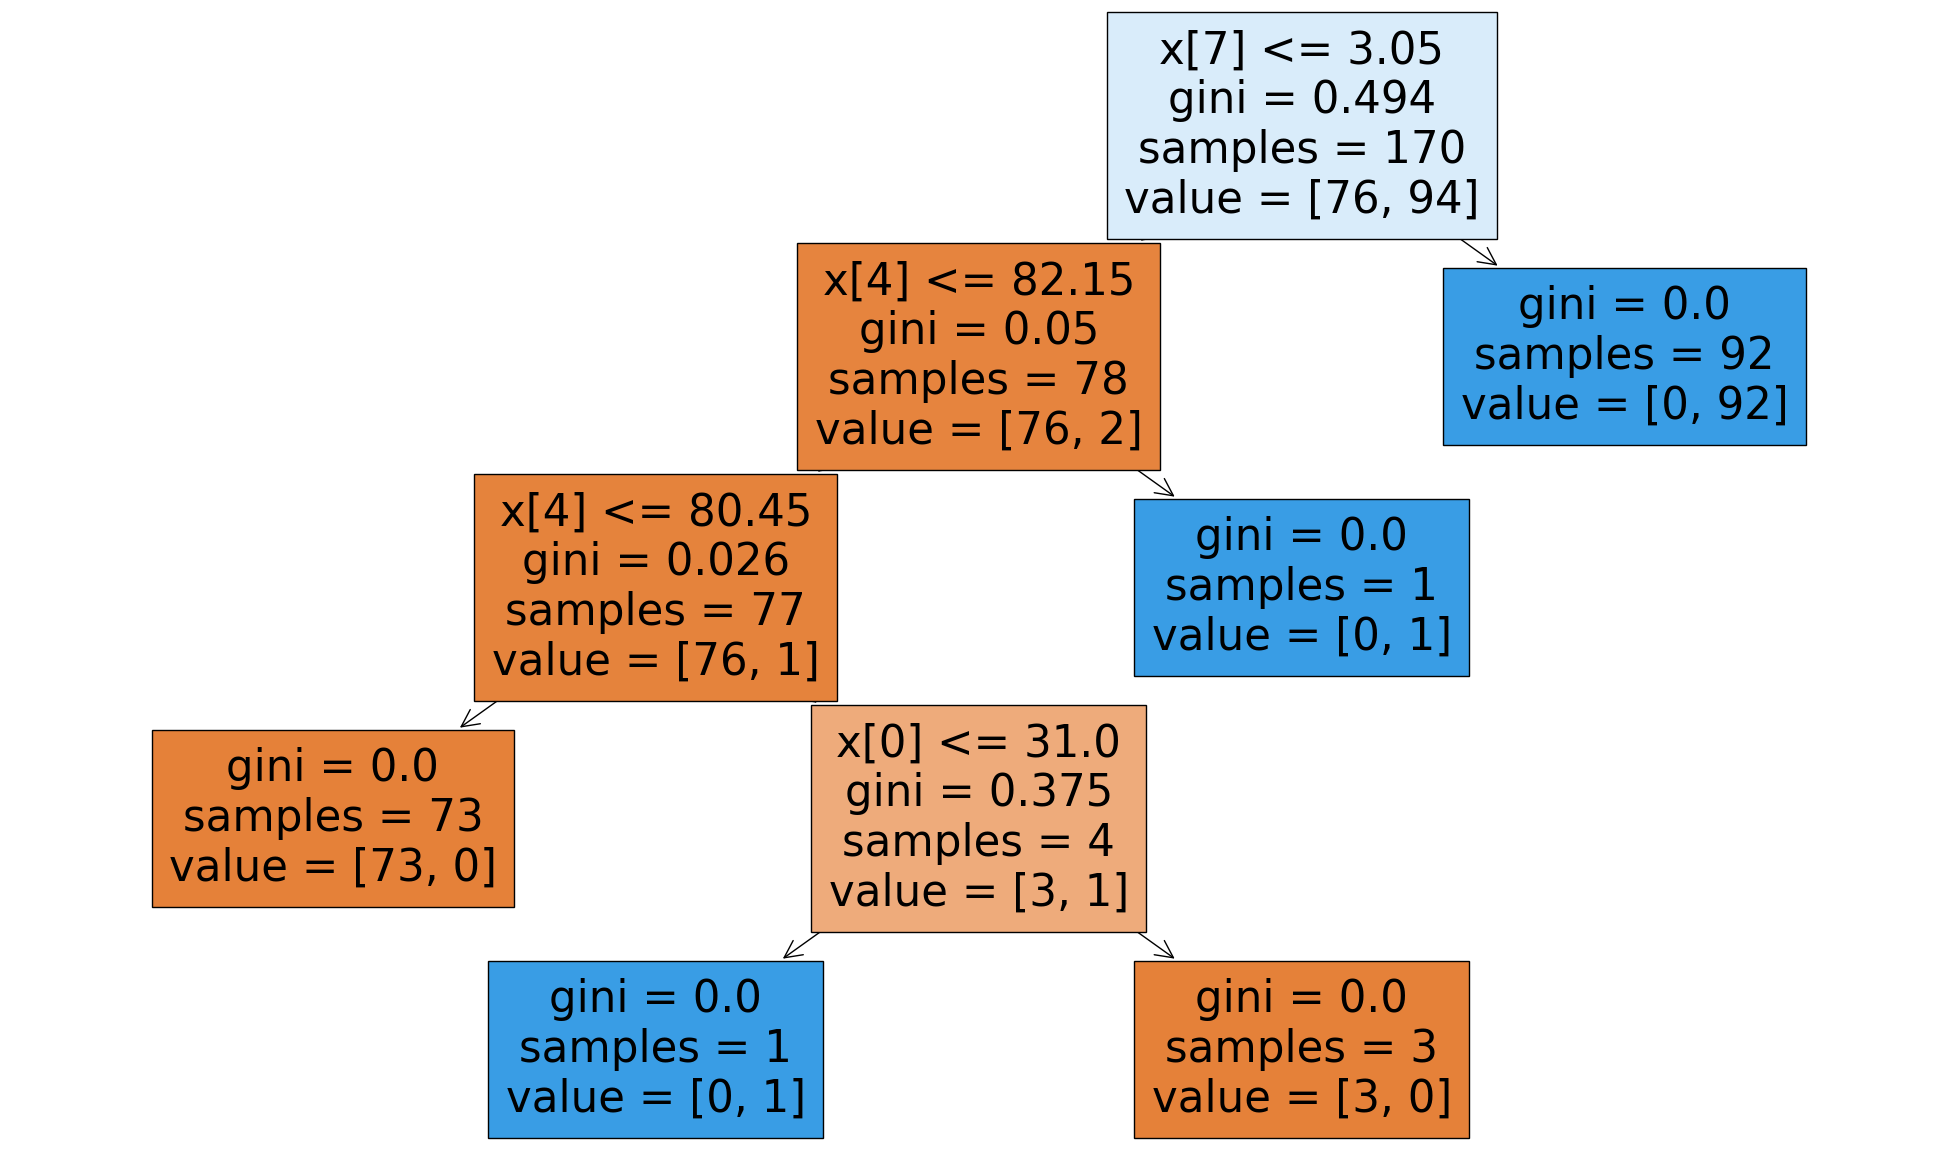

In [108]:
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [109]:
fig.savefig("decistion_tree_classifier.png")

In [110]:
y_predict = model.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test,y_predict)

0.9452054794520548

In [113]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']

}

In [114]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=3, verbose=1)

In [115]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [116]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [117]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 7,min_samples_split= 4,splitter='best')

In [118]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4)

[Text(0.6, 0.8333333333333334, 'x[7] <= 3.05\ngini = 0.494\nsamples = 170\nvalue = [76, 94]'),
 Text(0.4, 0.5, 'x[7] <= 2.55\ngini = 0.05\nsamples = 78\nvalue = [76, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 92\nvalue = [0, 92]')]

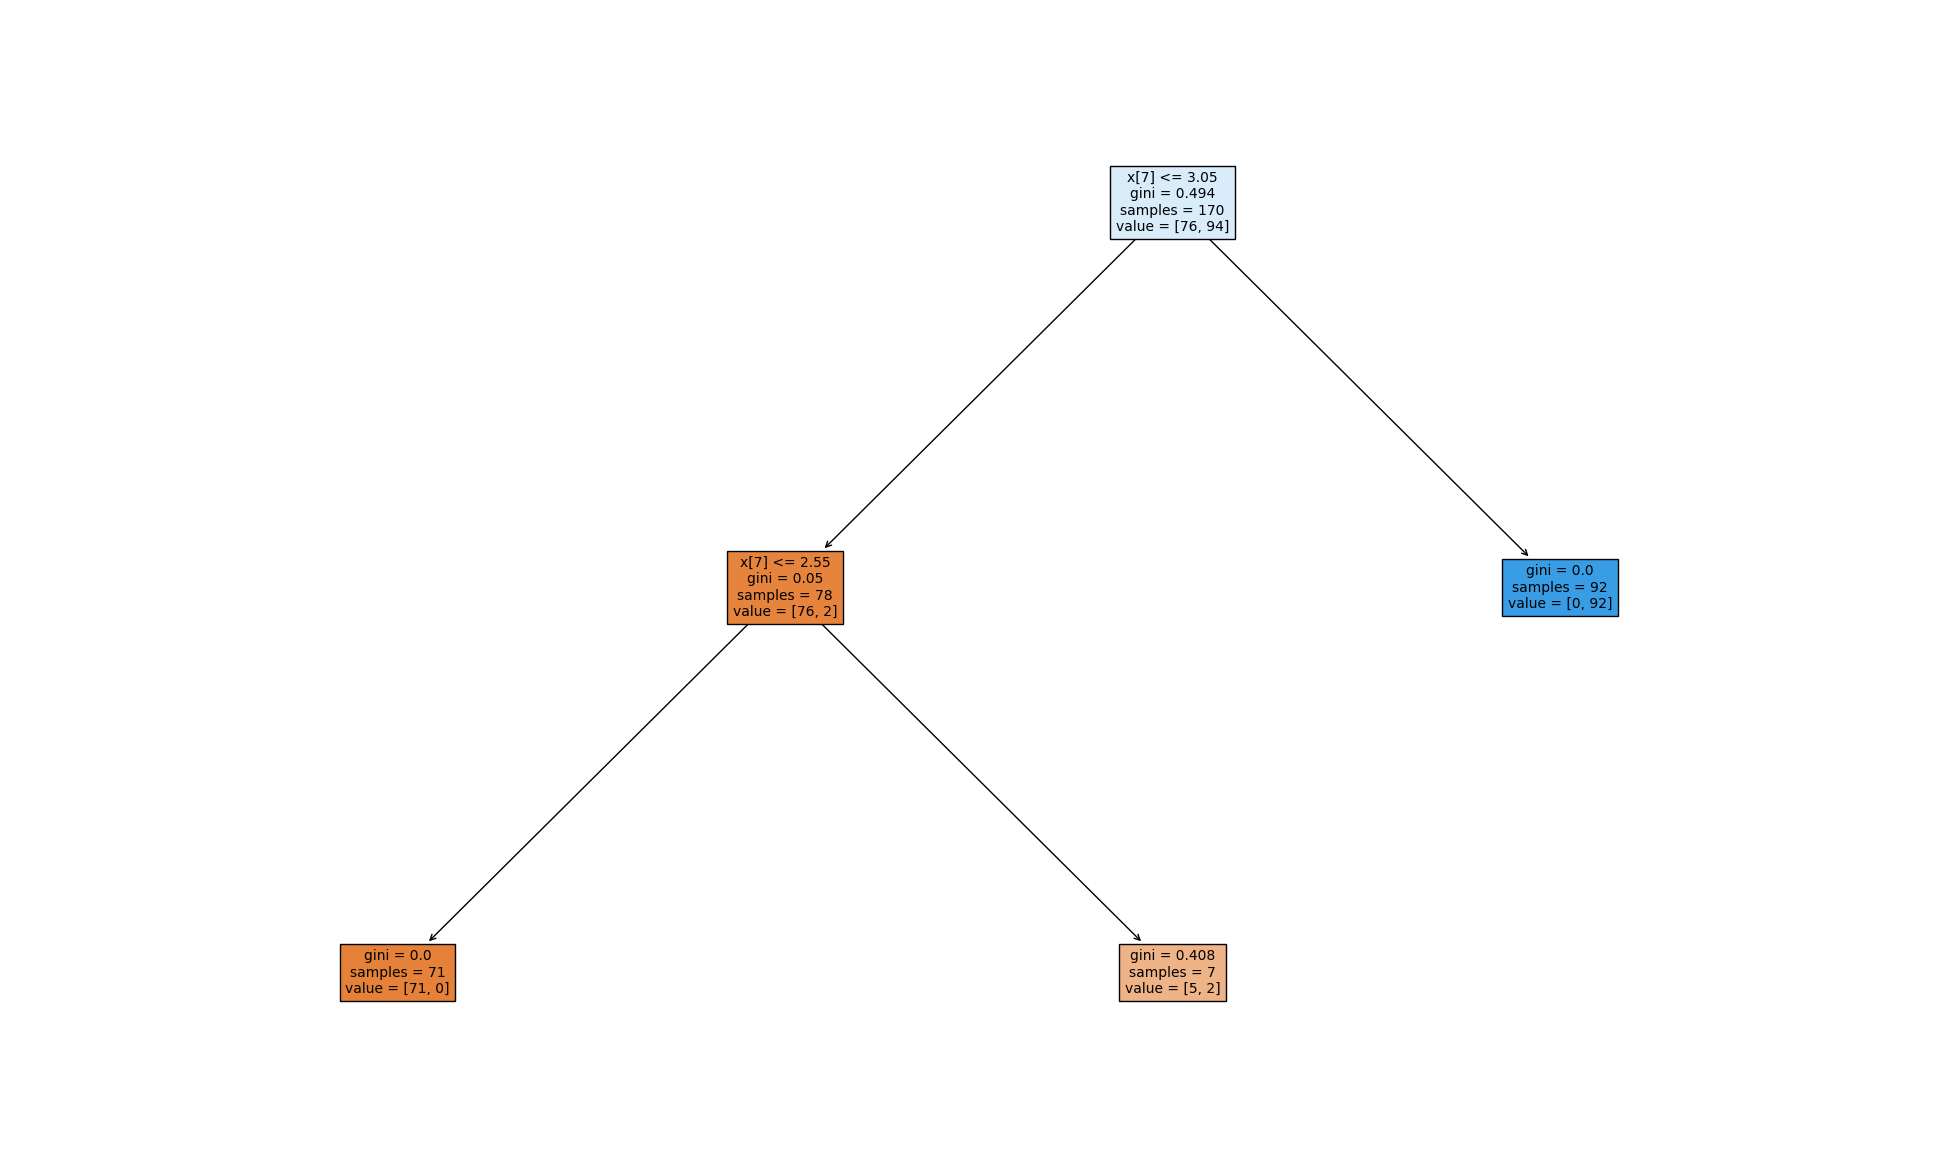

In [119]:
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [120]:
y_prediction2=model_with_best_params.predict(X_test)

In [121]:
accuracy_score(y_test,y_prediction2)

0.9315068493150684